<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Random Forest (Classification)

## Overview

- [Description](#Description)  
- [Random Forest](#Random-Forest)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)
    - [Using Entropy for calculating Information Gain](#Using-Entropy-for-calculating-Information-Gain)
    - [Using Gini Impurity for calculating Information Gain](#Using-Gini-Impurity-for-calculating-Information-Gain)

## Description

A **Random Forest** can be considered as an *ensemble* of decision trees. The idea behind esemble learning is to combine **weak learners** to build a more robust model, a **strong learner**, that has a better generalization error and is less susceptible to overfitting. The random forest algorithm consists of:

- Draw a random **bootstrap** sample of size n (randomly choose n samples from the training set with replacement)
- Grow a decision tree from the bootstrap sample. At each node:
    - Randomly select *d* features without replacement
    - Split the node using the feature that provides the best split according to the objective function, for instance, maximizin the information gain.
- Repeat previous steps *k* times
- Aggregate the prediction by each tree to assign the class label by **majority vote**


## Random Forest

[RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>RandomForestClassifier</strong> (n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, bootstrap=True, oob_score=False)
<br/>
Parameters:
<ul>
<li>n_estimators: the number of trees in the forest</li>
<li>criterion: the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain</li>
<li>max_depth: the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples</li>
<li>min_samples_split: the minimum number of samples required to split an internal node</li>
<li>min_samples_leaf: the minimum number of samples required to be at a leaf node</li>
<li>max_features: the number of features to consider when looking for the best split</li>
<li>bootsratp: whether bootstrap samples are used when building trees</li>
<li>oob_score: whether to use out-of-bag samples to estimate the generalization accuracy
</ul>
</div>

In [2]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [7]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [8]:
forest.classes_

array([0, 1, 2])

In [9]:
# feature_importances_
# The higher, the more important the feature. 
# The importance of a feature is computed as the (normalized) total reduction 
# of the criterion brought by that feature. It is also known as the Gini importance
forest.feature_importances_

array([ 0.2693788 ,  0.05537282,  0.33250937,  0.34273901])

In [10]:
print('Accuracy: {0}'.format(forest.score(X_test, y_test)))
y_pred = forest.predict(X_test)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.9111111111111111
Number of milabeled points: 4


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

### Using Entropy for calculating Information Gain

In [11]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.9555555555555556
Number of mislabeled points: 2


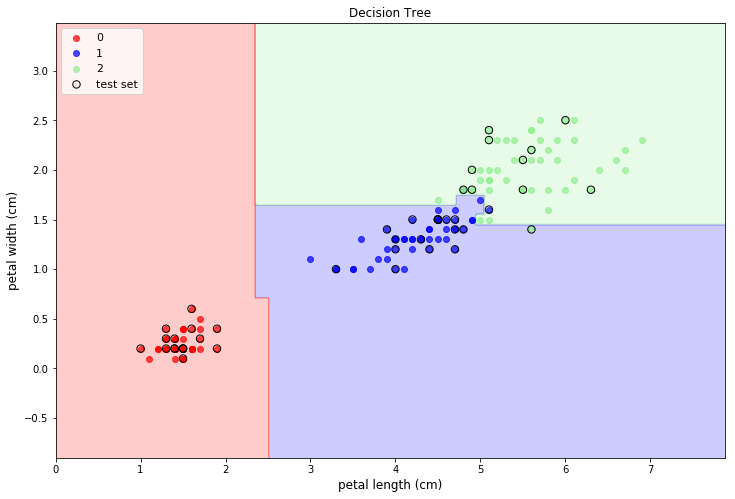

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

plot_decision_regions(X_train, X_test, y_train, y_test, classifier=forest, test_marker=True)
plt.title('Decision Tree')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

### Using Gini Impurity for calculating Information Gain

Accuracy: 0.9555555555555556
Number of mislabeled points: 2


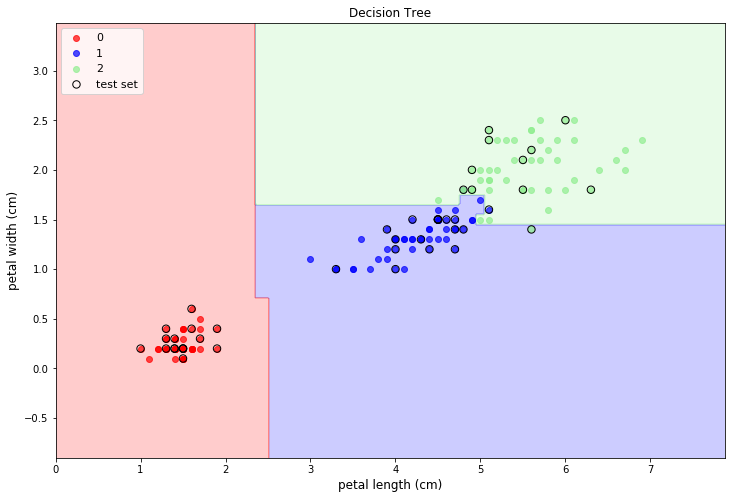

In [13]:
forest2 = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=1, n_jobs=-1)
forest2.fit(X_train, y_train)

plot_decision_regions(X_train, X_test, y_train, y_test, classifier=forest2, test_marker=True)
plt.title('Decision Tree')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')